# Polynomial Regression with SciKit-Learn

در این مثال سعی می کنیم شکل پیچیده تری از مدل ها را ایجاد کنیم. یعنی تشکیل مدل پیچیده تر با درنظر گرفتن توان بیشتر و همچنین رابطه ی بین متغیر ها

## فراخوانی کتابخانه ها

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## درباره دیتا
این دیتا میگه به ازای چقدر خرج کردن در پلتفرم های مختلف، یعنی تلوزیون، رادیو و روزنامه، چه قدر فروش داشتیم


In [2]:
df = pd.read_csv("Advertising.csv")

In [5]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


## Setting X and Y Values

متغیر های مسئله به همراه خروجی را در داده ها مشخص می کنیم

In [7]:
# همه ستون ها به جز ستون مربوط به فروش
X = df.drop('sales',axis=1)

In [8]:
y = df['sales']

## SciKit Learn 

---

## Polynomial Regression

**From Preprocessing, import PolynomialFeatures**
<br>
این تابع دو کار را انجام می دهد. افزایش توان متغیر های اولیه



$$\hat{y} = \beta_0 + \beta_1x_1 + \epsilon $$


$$\hat{y} = \beta_0 + \beta_1x_1 + \beta_1x^2_1 +  ... + \beta_dx^d_1 + \epsilon$$

<br>
و همچنین تشکیل رابطه های ممکنی که می تواند بین متغیر ها برقرار باشد. برای مثال در پیشبینی قیمت خانه طول حیات ضرب در عرض حیات می تواند به یک متغیر جدید و معنا دار تری تبدیل گردد
<br>
در مثال زیر
<br>
[a, b] 
<br>
با درجه 2 جمله ای به کتابخوانه خورانده و در نهایت متغیر های زیر را تشکیل می می شود
<br>
[1, a, b, a^2, ab, b^2]

In [9]:
from sklearn.preprocessing import PolynomialFeatures

In [10]:
polynomial_converter = PolynomialFeatures(degree=2,include_bias=False)

In [11]:
# ابتدا فیت و ساختار تشکیل و در ادامه داده ها را با دستور ترنسفرم، تغییر شکل می دهد

poly_features = polynomial_converter.fit_transform(X)

In [12]:
poly_features.shape

(200, 9)

In [13]:
X.shape

(200, 3)

In [14]:
X.iloc[0]

TV           230.1
radio         37.8
newspaper     69.2
Name: 0, dtype: float64

In [15]:
poly_features[0]

array([2.301000e+02, 3.780000e+01, 6.920000e+01, 5.294601e+04,
       8.697780e+03, 1.592292e+04, 1.428840e+03, 2.615760e+03,
       4.788640e+03])

In [16]:
poly_features[0][:3]

array([230.1,  37.8,  69.2])

In [17]:
poly_features[0][:3]**2

array([52946.01,  1428.84,  4788.64])

 $$x_1  \cdot x_2 \text{  and  } x_1  \cdot x_3 \text{  and  }   x_2  \cdot x_3 $$

In [16]:
230.1*37.8

8697.779999999999

In [18]:
230.1*69.2

15922.92

In [19]:
37.8*69.2

2615.7599999999998

## Train | Test Split

دیتا ها را به دو دسته، یعنی ترین و تست تقسیم می کنیم تا بتوانیم در ادامه کارکرد صحیح مدلمان را با داده های تست ارزیابی کنیم با این تفاوت که این بار متغیر های ورودی ما تغییر شکل داده شده و به صورت چند جمله ای می باشند

**توجه داشته باشین که زمانی که خواستیم هر نوع پیشبینی جدیدی انجام دهیم، متغیر های ورودی باید به شکل تابع چندجمله ای تشکیل داده شده در بیایند**

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

In [22]:
from sklearn.linear_model import LinearRegression

In [24]:
model = LinearRegression(fit_intercept=True)

In [25]:
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [26]:
test_predictions = model.predict(X_test)

In [27]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [28]:
MAE = mean_absolute_error(y_test,test_predictions)
MSE = mean_squared_error(y_test,test_predictions)
RMSE = np.sqrt(MSE)

In [29]:
MAE

0.4896798044803558

In [30]:
MSE

0.44175055104033756

In [31]:
RMSE

0.664643175726899

In [32]:
df['sales'].mean()

14.022500000000003

### مقایسه با مدلی که در مثال قبل تشکیل شده بود و از نوع چند جمله ای نبود

**توجه کنید! این مقایسه زمانی درست خواهد بود که تقسیم بندی داده ها به دو قسمت تست و ترین با سییید و درصد یکسان بوده باشد**

* Simple Linear Regression:
    * MAE: 1.213
    * RMSE: 1.516

* Polynomial 2-degree:
    * MAE: 0.4896
    * RMSE: 0.664

---
---
## انتخاب مدل نهایی

### تنظیم پارامتر ها

به نظر می رسد به خطای کمتری رسیدیم اما آیا این حالت بهترین حالت ممکن است؟ اگر درجه چند جمله ای بزرگتری اتخاذ کنیم چه طور؟ آیا خطا کم تر لزوما بهتر است؟ اکر دچار خطای اوور فیت یا های بایاس شده باشیم چی؟
<br>

با تشکیل تابعی و تعیین خطای تست دیتا و ترین دیتا با پارامتر های مختلف می توانیم بهترین پارامتر ها را انتخاب کنیم
<br>
### Bias Variance Trade Off
**توجه کنین! خطای مربوط به داده های تست با افزایش پیچیدگی مدل به مرور کاهش پیدا می کنه اما خطای داده های تست لزوما نه همیشه! تا یه جایی آره. اما از اونجا به بعد مسیر دیگه ای رو نسبت به داده های ترین در پیش می گیره و پیدا کردن اون نقطه هدف ماست از این مرحله**
<br>

In [34]:
# TRAINING ERROR PER DEGREE
train_rmse_errors = []
# TEST ERROR PER DEGREE
test_rmse_errors = []

for d in range(1,10):
    
    # CREATE POLY DATA SET FOR DEGREE "d"
    polynomial_converter = PolynomialFeatures(degree=d,include_bias=False)
    poly_features = polynomial_converter.fit_transform(X)
    
    # SPLIT THIS NEW POLY DATA SET
    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)
    
    # TRAIN ON THIS NEW POLY SET
    model = LinearRegression(fit_intercept=True)
    model.fit(X_train,y_train)
    
    # PREDICT ON BOTH TRAIN AND TEST
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    
    # Calculate Errors
    
    # Errors on Train Set
    train_RMSE = np.sqrt(mean_squared_error(y_train,train_pred))
    
    # Errors on Test Set
    test_RMSE = np.sqrt(mean_squared_error(y_test,test_pred))

    # Append errors to lists for plotting later
    
   
    train_rmse_errors.append(train_RMSE)
    test_rmse_errors.append(test_RMSE)

به نظر می رسد تنظیم پارامتر چندجمله ای روی 3 گزینه ی ایده آلی است

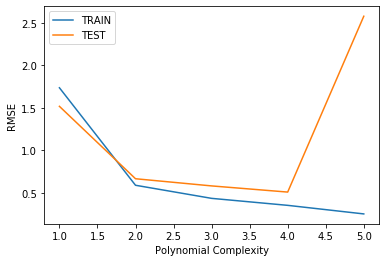

In [35]:
plt.plot(range(1,6),train_rmse_errors[:5],label='TRAIN')
plt.plot(range(1,6),test_rmse_errors[:5],label='TEST')
plt.xlabel("Polynomial Complexity")
plt.ylabel("RMSE")
plt.legend()

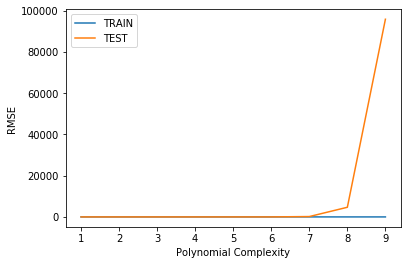

In [36]:
plt.plot(range(1,10),train_rmse_errors,label='TRAIN')
plt.plot(range(1,10),test_rmse_errors,label='TEST')
plt.xlabel("Polynomial Complexity")
plt.ylabel("RMSE")
plt.legend()

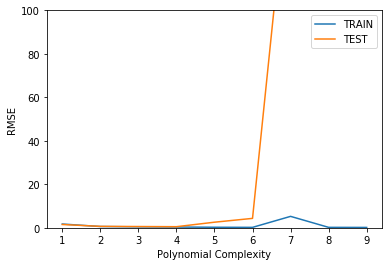

In [37]:
plt.plot(range(1,10),train_rmse_errors,label='TRAIN')
plt.plot(range(1,10),test_rmse_errors,label='TEST')
plt.xlabel("Polynomial Complexity")
plt.ylabel("RMSE")
plt.ylim(0,100)
plt.legend()

## پیاده سازی مدل نهایی شده

بعد از رسیدن به بهترین پارامتر ها و انتخاب مدل بهینه، آن رو روی کل داده ها پیاده سازی می کنیم
1. انتخاب پارامتر های بهینه
2. خوراندن کل داده ها به مدل با پارامتر های بهینه
3. ذخیره سازی تابع مربوط به ایجاد متغیر های چند جمله ای
4. ذخیره سازی مدل

In [38]:

final_poly_converter = PolynomialFeatures(degree=3,include_bias=False)

In [39]:
final_model = LinearRegression()

In [40]:
final_model.fit(final_poly_converter.fit_transform(X),y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### ذخیره سازی 

In [41]:
from joblib import dump, load

In [42]:
dump(final_model, 'sales_poly_model.joblib') 

['sales_poly_model.joblib']

In [43]:
dump(final_poly_converter,'poly_converter.joblib')

['poly_converter.joblib']

## توسعه مدل

### پیشبینی بر روی داده های جدید

برای پیشبینی داده های جدید ابتدا باید شکل ورودی های آن رو تغییر دهیم و در نهایت به مدل ذخیره شده بخورانیم

**برای مثال فرض کنید برای یک کمپین تبلیغاتی جدید می خواهیم 149 واحد در تلوزیون، 22 واحد در رادیو و 12 واحد در روزنامه هزینه کنیم.چه قدر فروش خواهیم داشت**

In [44]:
loaded_poly = load('poly_converter.joblib')
loaded_model = load('sales_poly_model.joblib')

In [45]:
campaign = [[149,22,12]]

In [46]:
campaign_poly = loaded_poly.transform(campaign)

In [47]:
campaign_poly

array([[1.490000e+02, 2.200000e+01, 1.200000e+01, 2.220100e+04,
        3.278000e+03, 1.788000e+03, 4.840000e+02, 2.640000e+02,
        1.440000e+02, 3.307949e+06, 4.884220e+05, 2.664120e+05,
        7.211600e+04, 3.933600e+04, 2.145600e+04, 1.064800e+04,
        5.808000e+03, 3.168000e+03, 1.728000e+03]])

In [48]:
final_model.predict(campaign_poly)

array([14.64501014])

-----
---